In [42]:
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Đọc dữ liệu làm sạch
df = pd.read_csv("D:\\Code\\HR_Attrition_Analyzer\\data\\employee_cleaned.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [43]:
# B2: Loại bỏ các cột không cần thiết
drop_cols = ['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
X = df.drop(columns=drop_cols)
y = df['Attrition']

In [44]:
# B3: Encode cột categorical
from sklearn.preprocessing import LabelEncoder
cat_cols = X.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

In [45]:
# B4: Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, stratify=y)


In [46]:
# B5: Khởi tạo và huấn luyện mô hình Random Forest
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)

,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
# B6: Đánh giá mô hình
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        print("=== TRAINING RESULT ===")
        print("Classification Report:\n", classification_report(y_train, clf.predict(X_train)))
        print("Confusion Matrix:\n", confusion_matrix(y_train, clf.predict(X_train)))
        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: {:.4f}".format(np.mean(res)))
        print("Accuracy STD: {:.4f}".format(np.std(res)))
        print("-" * 50)
    else:
        print("=== TEST RESULT ===")
        print("Classification Report:\n", classification_report(y_test, clf.predict(X_test)))
        print("Confusion Matrix:\n", confusion_matrix(y_test, clf.predict(X_test)))
        print("Accuracy Score: {:.4f}".format(accuracy_score(y_test, clf.predict(X_test))))
        print("-" * 50)

print_score(rf, X_train, y_train, X_test, y_test, train=True)
print_score(rf, X_train, y_train, X_test, y_test, train=False)


=== TRAINING RESULT ===
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       924
           1       0.99      0.92      0.95       178

    accuracy                           0.99      1102
   macro avg       0.99      0.96      0.97      1102
weighted avg       0.99      0.99      0.99      1102

Confusion Matrix:
 [[923   1]
 [ 15 163]]
Average Accuracy: 0.8439
Accuracy STD: 0.0136
--------------------------------------------------
=== TEST RESULT ===
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       309
           1       0.83      0.25      0.39        59

    accuracy                           0.87       368
   macro avg       0.85      0.62      0.66       368
weighted avg       0.87      0.87      0.84       368

Confusion Matrix:
 [[306   3]
 [ 44  15]]
Accuracy Score: 0.8723
--------------------------------------------------

C:\Users\vovan\AppData\Local\Temp\ipykernel_12456\3658658005.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')


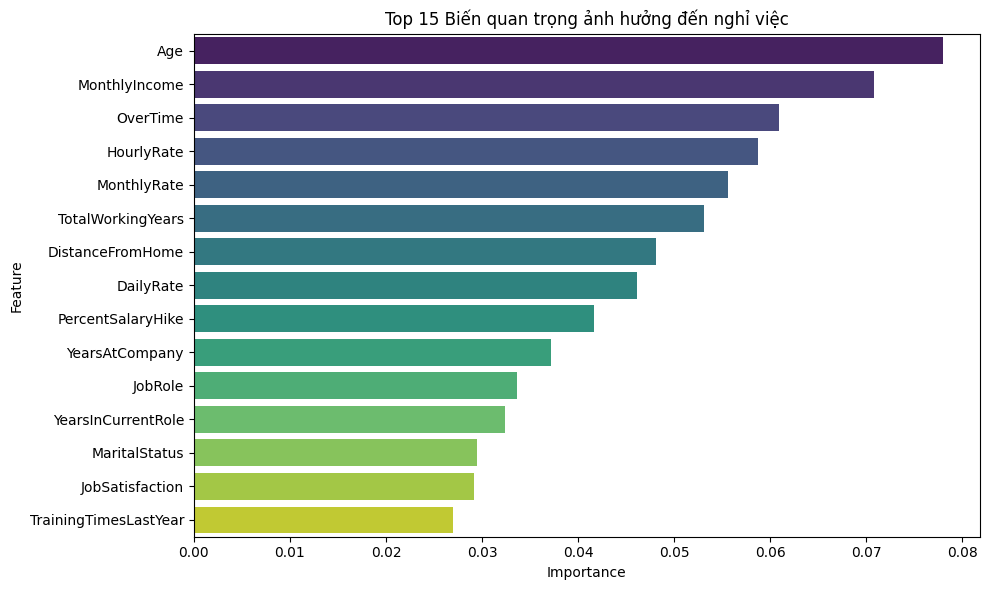

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trích xuất feature importance
importances = rf.feature_importances_
features = X.columns

# Tạo DataFrame
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title("Top 15 Biến quan trọng ảnh hưởng đến nghỉ việc")
plt.tight_layout()
plt.show()


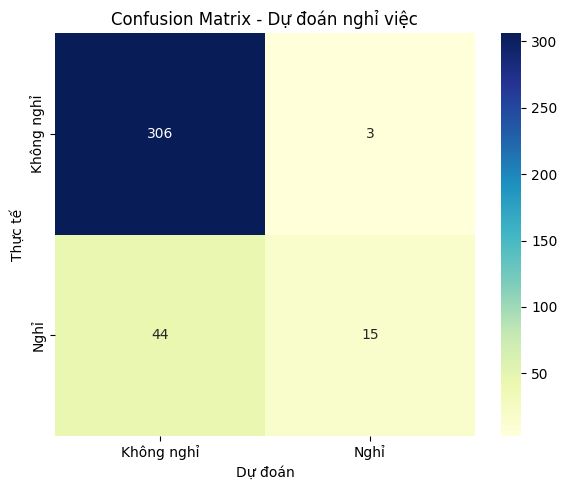

In [49]:


# Dự đoán trên test set
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Vẽ heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['Không nghỉ', 'Nghỉ'],
            yticklabels=['Không nghỉ', 'Nghỉ'])
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.title('Confusion Matrix - Dự đoán nghỉ việc')
plt.tight_layout()
plt.show()


In [51]:
model_dir = r'D:\Code\HR_Attrition_Analyzer\models'
# Đường dẫn file đầy đủ
model_path = os.path.join(model_dir, 'rf_model.pkl')
# Lưu mô hình
joblib.dump(rf, model_path)
print(f"✅ Mô hình đã được lưu tại: {model_path}")

✅ Mô hình đã được lưu tại: D:\Code\HR_Attrition_Analyzer\models\rf_model.pkl
